In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nfl-big-data-bowl-2025/players.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_7.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_9.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_6.csv
/kaggle/input/nfl-big-data-bowl-2025/games.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_8.csv
/kaggle/input/nfl-big-data-bowl-2025/player_play.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_4.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_3.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_5.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_1.csv
/kaggle/input/nfl-big-data-bowl-2025/plays.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_2.csv


# Data Preprocesing

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## games.csv

### Assesing data

In [3]:
games_df = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2025/games.csv')
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   gameId             136 non-null    int64 
 1   season             136 non-null    int64 
 2   week               136 non-null    int64 
 3   gameDate           136 non-null    object
 4   gameTimeEastern    136 non-null    object
 5   homeTeamAbbr       136 non-null    object
 6   visitorTeamAbbr    136 non-null    object
 7   homeFinalScore     136 non-null    int64 
 8   visitorFinalScore  136 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 9.7+ KB


In [4]:
games_df.describe(include="all")

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
count,1.360000e+02,136.0,136.000000,136,136,136,136,136.000000,136.000000
unique,NaN,NaN,NaN,27,8,32,32,NaN,NaN
top,NaN,NaN,NaN,10/9/2022,13:00:00,NO,BUF,NaN,NaN
freq,NaN,NaN,NaN,14,73,6,5,NaN,NaN
mean,2.022099e+09,2022.0,4.845588,NaN,NaN,NaN,NaN,22.669118,20.948529
std,5.996614e+03,0.0,2.567254,NaN,NaN,NaN,NaN,8.659874,9.731446
min,2.022091e+09,2022.0,1.000000,NaN,NaN,NaN,NaN,3.000000,0.000000
25%,2.022093e+09,2022.0,3.000000,NaN,NaN,NaN,NaN,17.000000,14.750000
50%,2.022101e+09,2022.0,5.000000,NaN,NaN,NaN,NaN,22.500000,20.000000
75%,2.022102e+09,2022.0,7.000000,NaN,NaN,NaN,NaN,27.000000,27.000000


In [5]:
games_df.head(20)

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
0,2022090800,2022,1,9/8/2022,20:20:00,LA,BUF,10,31
1,2022091100,2022,1,9/11/2022,13:00:00,ATL,NO,26,27
2,2022091101,2022,1,9/11/2022,13:00:00,CAR,CLE,24,26
3,2022091102,2022,1,9/11/2022,13:00:00,CHI,SF,19,10
4,2022091103,2022,1,9/11/2022,13:00:00,CIN,PIT,20,23
5,2022091104,2022,1,9/11/2022,13:00:00,DET,PHI,35,38
6,2022091105,2022,1,9/11/2022,13:00:00,HOU,IND,20,20
7,2022091106,2022,1,9/11/2022,13:00:00,MIA,NE,20,7
8,2022091107,2022,1,9/11/2022,13:00:00,NYJ,BAL,9,24
9,2022091109,2022,1,9/11/2022,13:00:00,WAS,JAX,28,22


In [6]:
games_df.isna().sum()

gameId               0
season               0
week                 0
gameDate             0
gameTimeEastern      0
homeTeamAbbr         0
visitorTeamAbbr      0
homeFinalScore       0
visitorFinalScore    0
dtype: int64

In [7]:
print("Number of duplicate data: ", games_df.duplicated().sum())

Number of duplicate data:  0


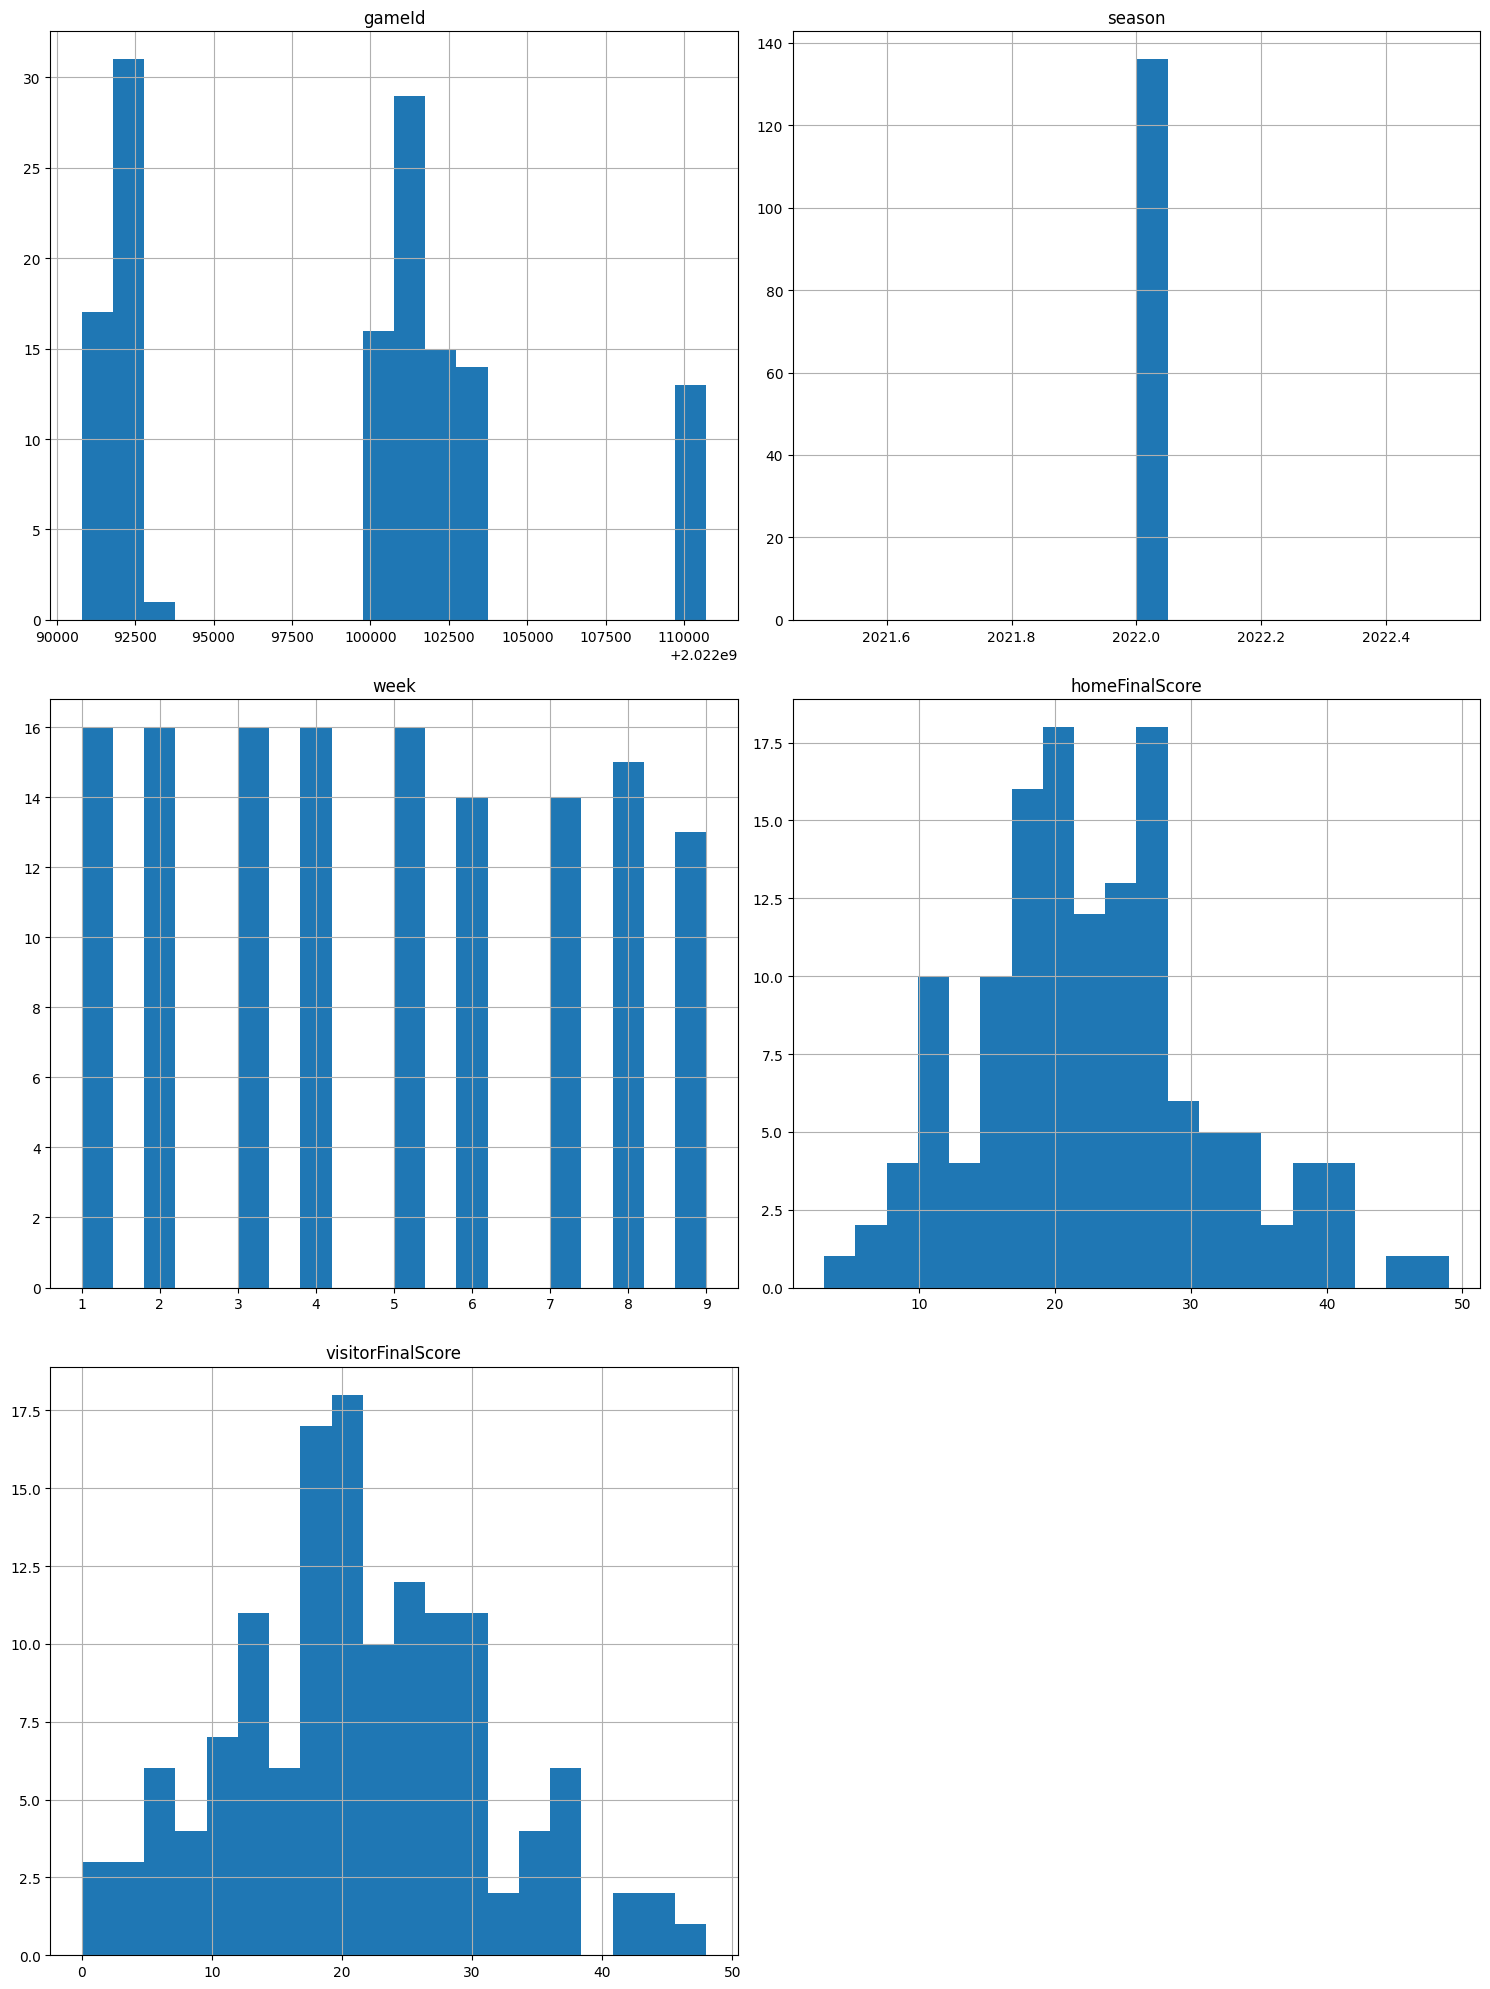

In [8]:
games_df.hist(bins=20, figsize=(15, 20))
plt.tight_layout()
plt.show()

**Insight:**
- gameDate data type is still object
- gameTimeEastern data type is still object
- No missing values
- No duplicated data
- No winner column for each match
- No loser column for each match
- There needs to be a column containing match categories (fierce, so-so, far apart)

### Cleaning and exploring the data

Change the data type 'gameDate' to datetime

In [9]:

games_df['gameDate'] = pd.to_datetime(games_df['gameDate'])
#games_df['gameTimeEastern'] = pd.to_datetime(games_df['gameTimeEastern'],format='%H:%M:%S').dt.time

Added match winner and loser columns

In [10]:
games_df['win']= games_df.apply(
    lambda row: row['homeTeamAbbr'] if row['homeFinalScore'] > row['visitorFinalScore']
    else row['visitorTeamAbbr'] if row['homeFinalScore'] < row['visitorFinalScore'] else "none",
    axis=1
)

In [11]:
games_df['lose']= games_df.apply(
    lambda row: row['homeTeamAbbr'] if row['homeFinalScore'] < row['visitorFinalScore'] else 
    row['visitorTeamAbbr'] if row['homeFinalScore'] > row['visitorFinalScore'] else "none",
    axis=1
)

In [12]:
games_df['score_dif'] = games_df['homeFinalScore'] - games_df['visitorFinalScore']
games_df['score_dif'] = games_df['score_dif'].abs()

In [13]:
print("Number of drawn matches: ", (games_df['win'] == 'none').sum())
games_df[games_df['win'] == 'none']

Number of drawn matches:  1


,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore,win,lose,score_dif
6,2022091105,2022,1,2022-09-11,13:00:00,HOU,IND,20,20,none,none,0


There was a match with a draw result in the match with gameId (2022091105)

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = games_df['score_dif']

kmeans = KMeans(n_clusters=3, random_state=42)

games_df['cluster'] = kmeans.fit_predict(games_df[['score_dif']])

centers = kmeans.cluster_centers_

print(f"cluster centers : {centers}")

cluster centers : [[14.22857143]
 [ 4.41666667]
 [24.29411765]]


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


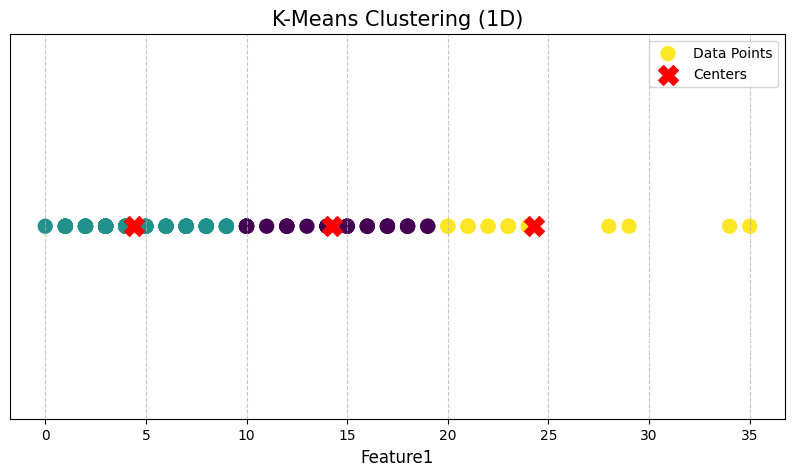

In [15]:
plt.figure(figsize=(10, 5))
plt.scatter(games_df['score_dif'], [0] * len(games_df), c=games_df['cluster'], cmap='viridis', label='Data Points', s=100)
plt.scatter(centers, [0] * len(centers), c='red', marker='X', label='Centers', s=200)
plt.title('K-Means Clustering (1D)', fontsize=15)
plt.xlabel('Feature1', fontsize=12)
plt.yticks([])  # Remove y-axis ticks as it's a 1D visualization
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [16]:
games_df.groupby(by='cluster').gameId.nunique()

cluster
0    35
1    84
2    17
Name: gameId, dtype: int64

In [17]:
games_df['pertandingan'] = games_df.apply(
    lambda row: 'close_game' if row['cluster'] == 1 else 'standard_contest' if row['cluster'] == 0 else 'blowout',
    axis=1
)

<Axes: >

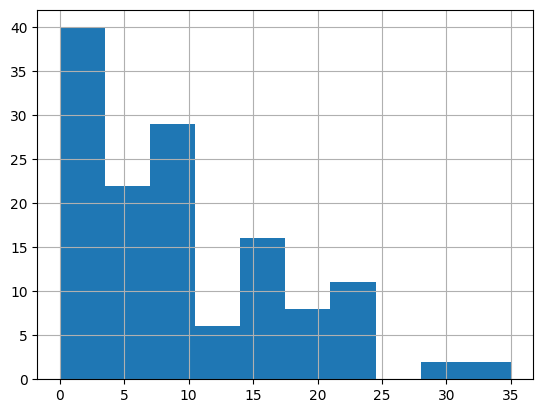

In [18]:
games_df.score_dif.hist()

In [19]:
games_df

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore,win,lose,score_dif,cluster,pertandingan
0,2022090800,2022,1,2022-09-08,20:20:00,LA,BUF,10,31,BUF,LA,21,2,blowout
1,2022091100,2022,1,2022-09-11,13:00:00,ATL,NO,26,27,NO,ATL,1,1,close_game
2,2022091101,2022,1,2022-09-11,13:00:00,CAR,CLE,24,26,CLE,CAR,2,1,close_game
3,2022091102,2022,1,2022-09-11,13:00:00,CHI,SF,19,10,CHI,SF,9,1,close_game
4,2022091103,2022,1,2022-09-11,13:00:00,CIN,PIT,20,23,PIT,CIN,3,1,close_game
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,2022110607,2022,9,2022-11-06,13:00:00,WAS,MIN,17,20,MIN,WAS,3,1,close_game
132,2022110608,2022,9,2022-11-06,16:05:00,ARI,SEA,21,31,SEA,ARI,10,0,standard_contest
133,2022110609,2022,9,2022-11-06,16:25:00,TB,LA,16,13,TB,LA,3,1,close_game
134,2022110610,2022,9,2022-11-06,20:20:00,KC,TEN,20,17,KC,TEN,3,1,close_game


From the homeFinalScore and visitorFinalScore data, we can get insight into the course of the match by knowing the difference in scores obtained by the winning team and the losing team. Furthermore, clustering is carried out on the score difference data into three clusters. This cluster divides the course of the match into categories that have the following center clusters: close_game (4.41666667), standard_contes (14.22857143), and blowout (24.29411765).5]

### Visualization

Visual:
- Highest scorer per match
- Highest accumulated score
- Match with the highest number of scores
- Team with the most wins
- Team with the most losses
- Match progress (each number of matches intense, normal, far apart)

**Highest scorer per match**

In [20]:
score_home_df = pd.DataFrame(games_df[['homeTeamAbbr', 'homeFinalScore']])
score_visitor_df = pd.DataFrame(games_df[['visitorTeamAbbr', 'visitorFinalScore']])

In [21]:
score_home_df.rename(columns={'homeTeamAbbr': 'team', 'homeFinalScore': 'score'}, inplace=True)
score_visitor_df.rename(columns={'visitorTeamAbbr': 'team', 'visitorFinalScore': 'score'}, inplace=True)

In [22]:
score_df = pd.concat([score_home_df, score_visitor_df])
score_df

,team,score
0,LA,10
1,ATL,26
2,CAR,24
3,CHI,19
4,CIN,20
...,...,...
131,MIN,20
132,SEA,31
133,LA,13
134,TEN,17


In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


kmeans = KMeans(n_clusters=3, random_state=42)

score_df['cluster'] = kmeans.fit_predict(score_df[['score']])

centers = kmeans.cluster_centers_

print(f"cluster centers : {centers}")

cluster centers : [[23.39230769]
 [12.27659574]
 [36.1875    ]]


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


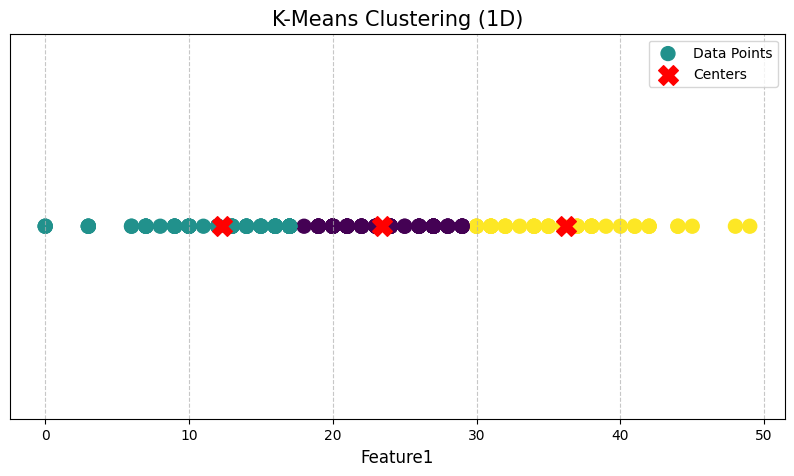

In [24]:
plt.figure(figsize=(10, 5))
plt.scatter(score_df['score'], [0] * len(score_df), c=score_df['cluster'], cmap='viridis', label='Data Points', s=100)
plt.scatter(centers, [0] * len(centers), c='red', marker='X', label='Centers', s=200)
plt.title('K-Means Clustering (1D)', fontsize=15)
plt.xlabel('Feature1', fontsize=12)
plt.yticks([])  # Remove y-axis ticks as it's a 1D visualization
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [25]:
score_df.groupby(by='cluster').team.count()

cluster
0    130
1     94
2     48
Name: team, dtype: int64

In [26]:
score_df = score_df.sort_values(by='score', ascending=False)
score_df.head(5)

,team,score,cluster
111,DAL,49,2
53,SEA,48,2
53,DET,45,2
10,KC,44,2
105,KC,44,2


In [27]:
score_df = score_df.sort_values(by='score', ascending=True)
score_df.head(5)

,team,score,cluster
70,DET,0,1
114,LV,0,1
20,IND,0,1
14,DAL,3,1
129,IND,3,1


In [28]:
score_df.groupby(by='cluster').agg({
    'score': ['max','min', 'count', 'sum']
})

score                
          max min count   sum
cluster                      
0          29  18   130  3041
1          17   0    94  1154
2          49  30    48  1737

In [29]:
score_df.head()

,team,score,cluster
70,DET,0,1
114,LV,0,1
20,IND,0,1
14,DAL,3,1
129,IND,3,1


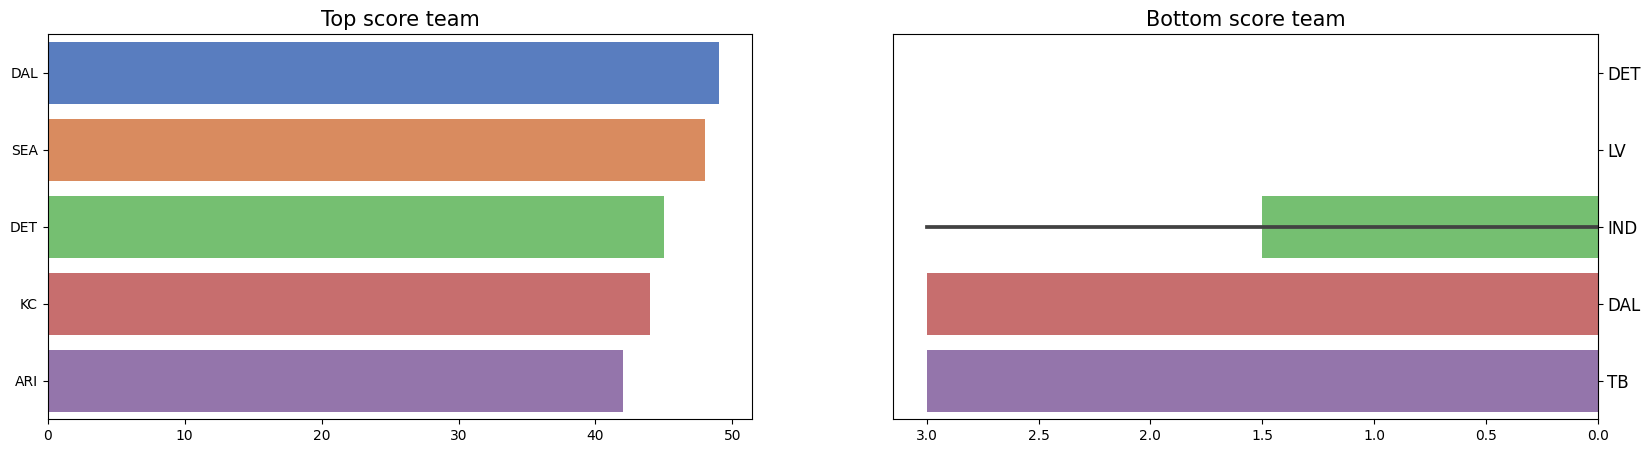

In [30]:

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

sns.barplot(x="score", y="team", data=score_df.sort_values(by='score', ascending=False).head(6), palette='muted', ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Top score team", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=10)

sns.barplot(x="score", y="team", data=score_df.sort_values(by='score', ascending=True).head(6), palette='muted', ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Bottom score team", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.show()

fig.savefig('fig1.png')

**Highest and lowest score accumulation**

In [31]:
agg_score_df = score_df.groupby(by='team').score.sum().sort_values(ascending=False).reset_index()
agg_score_df.head(5)

,team,score
0,KC,243
1,SEA,241
2,BAL,235
3,CIN,228
4,PHI,225


In [32]:
agg_score_df.tail(5)

,team,score
27,HOU,133
28,IND,132
29,LA,131
30,DEN,121
31,PIT,120


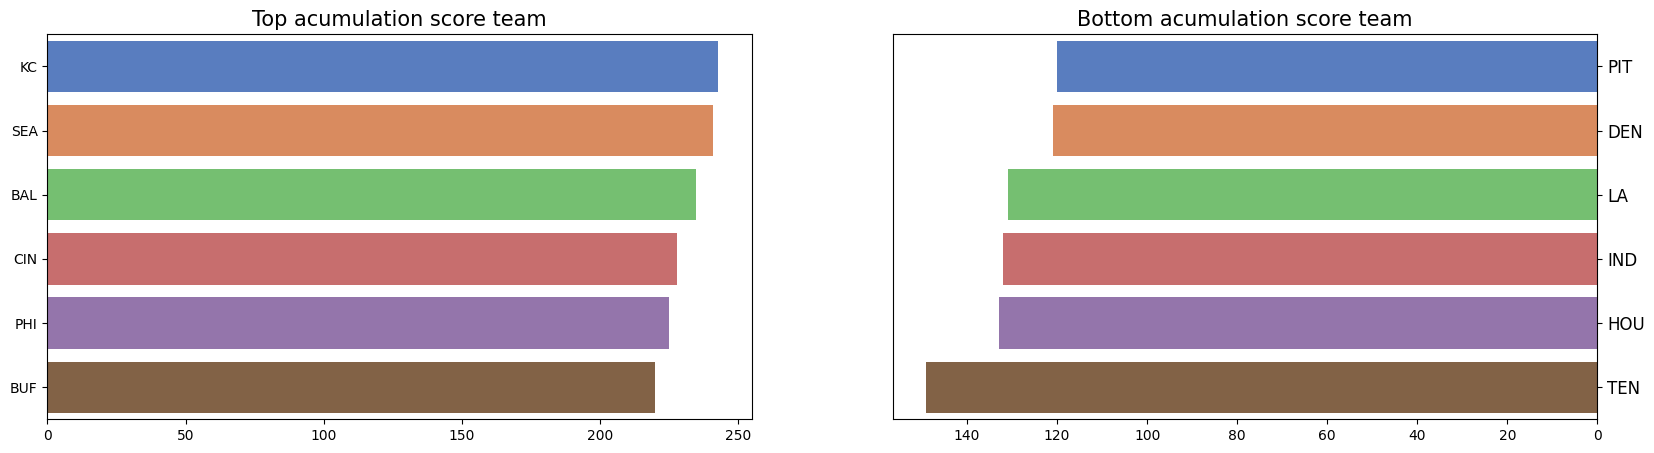

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

sns.barplot(x="score", y="team", data=agg_score_df.sort_values(by='score', ascending=False).head(6), palette='muted', ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Top acumulation score team", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=10)

sns.barplot(x="score", y="team", data=agg_score_df.sort_values(by='score', ascending=True).head(6), palette='muted', ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Bottom acumulation score team", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.show()
fig.savefig('fig2.png')

In [34]:
len(agg_score_df)

32

**Match with the highest and lowest total score**

In [35]:
games_df['total_score'] = games_df['homeFinalScore'] + games_df['visitorFinalScore']

In [36]:
total_score_games_df = pd.DataFrame({'match' : games_df['homeTeamAbbr'] + " vs " + games_df['visitorTeamAbbr'], 'total_score': games_df['total_score'],})

In [37]:
total_score_games_df.sort_values(by="total_score", ascending=False).head()


,match,total_score
53,DET vs SEA,93
17,BAL vs MIA,80
111,DAL vs CHI,78
94,ARI vs NO,76
5,DET vs PHI,73


In [38]:
total_score_games_df.sort_values(by="total_score", ascending=False).tail()

,match,total_score
14,DAL vs TB,22
46,DEN vs SF,21
64,DEN vs IND,21
80,CHI vs WAS,19
68,JAX vs HOU,19


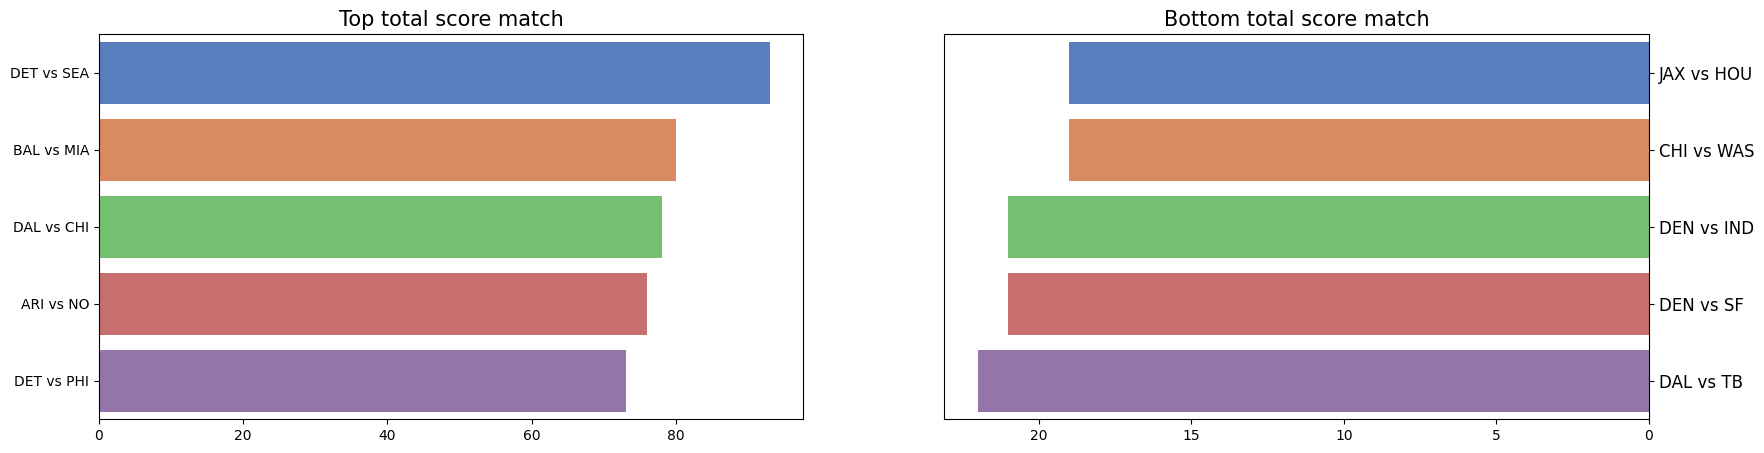

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

sns.barplot(x="total_score", y="match", data=total_score_games_df.sort_values(by='total_score', ascending=False).head(5), palette='muted', ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Top total score match", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=10)

sns.barplot(x="total_score", y="match", data=total_score_games_df.sort_values(by='total_score', ascending=True).head(5), palette='muted', ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Bottom total score match", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.show()
fig.savefig('fig3.png')

**Team that wins the most**

In [40]:
win_games_df = games_df.groupby(by='win').gameId.nunique().sort_values(ascending=False).reset_index()
lose_games_df = games_df.groupby(by='lose').gameId.nunique().sort_values(ascending=False).reset_index()

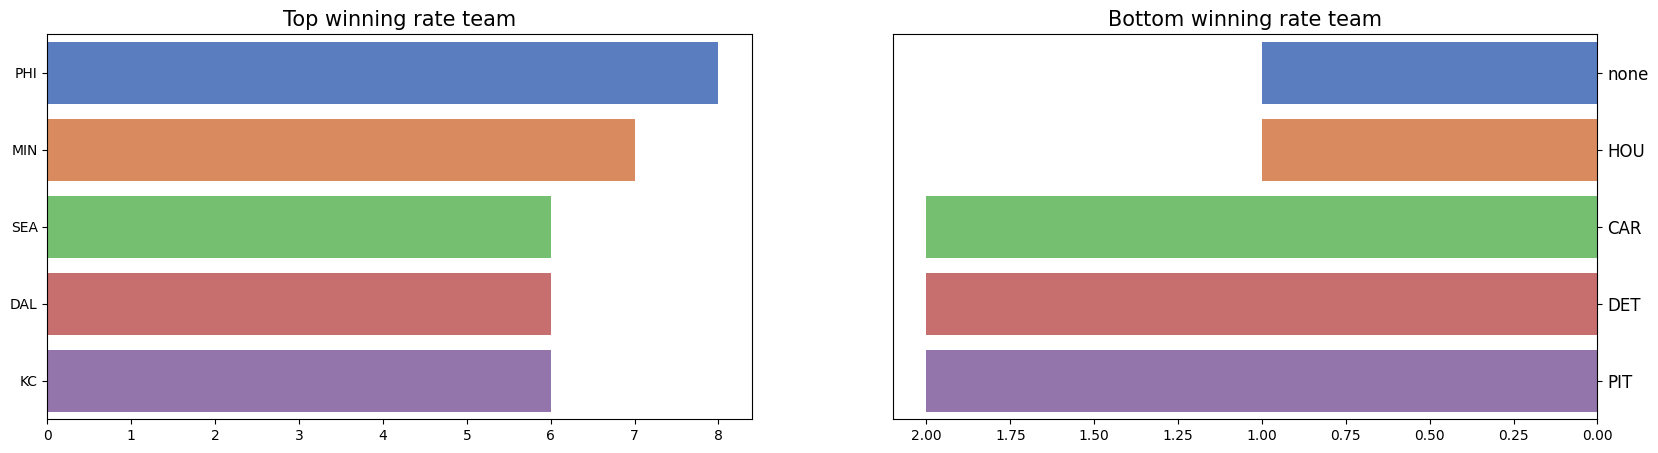

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

sns.barplot(x="gameId", y="win", data=win_games_df.sort_values(by='gameId', ascending=False).head(5), palette='muted', ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Top winning rate team", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=10)

sns.barplot(x="gameId", y="win", data=win_games_df.sort_values(by='gameId', ascending=True).head(5), palette='muted', ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Bottom winning rate team", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.show()
fig.savefig("fig4.png")

**The team that loses the most**

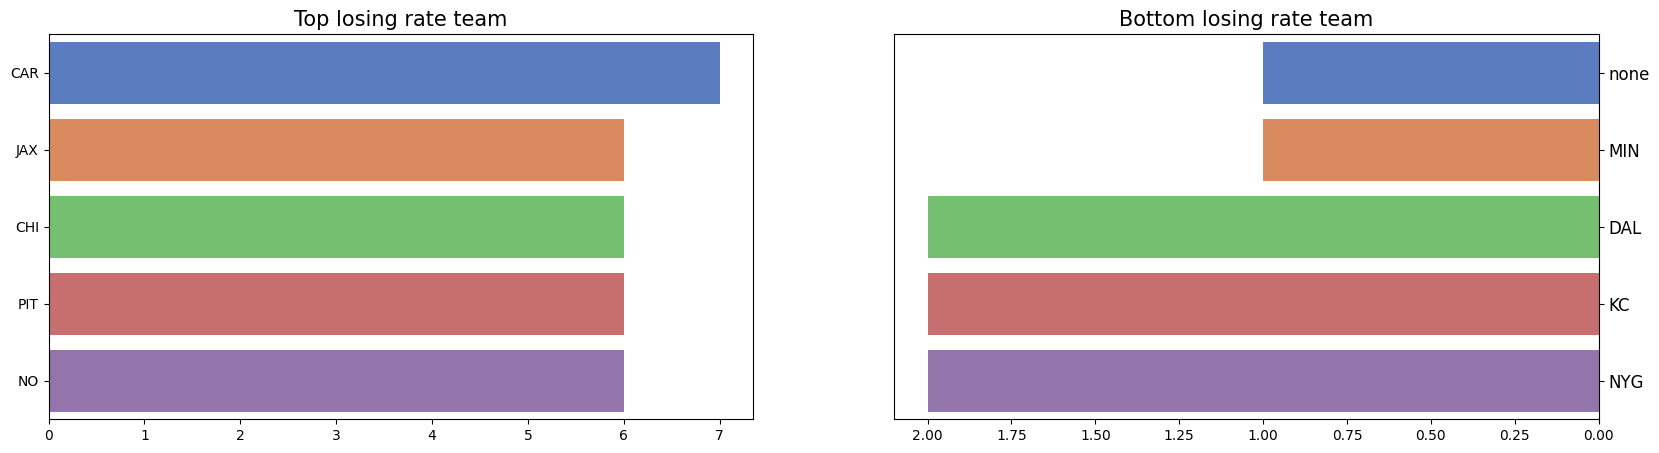

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

sns.barplot(x="gameId", y="lose", data=lose_games_df.sort_values(by='gameId', ascending=False).head(5), palette='muted', ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Top losing rate team", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=10)

sns.barplot(x="gameId", y="lose", data=lose_games_df.sort_values(by='gameId', ascending=True).head(5), palette='muted', ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Bottom losing rate team", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.show()
fig.savefig('fig5.png')

**Match progress (each number of matches intense, normal, far apart)**

In [43]:
pertandingan_games_df = games_df.groupby(by='pertandingan').gameId.nunique().sort_values(ascending=False).reset_index()
pertandingan_games_df

,pertandingan,gameId
0,close_game,84
1,standard_contest,35
2,blowout,17


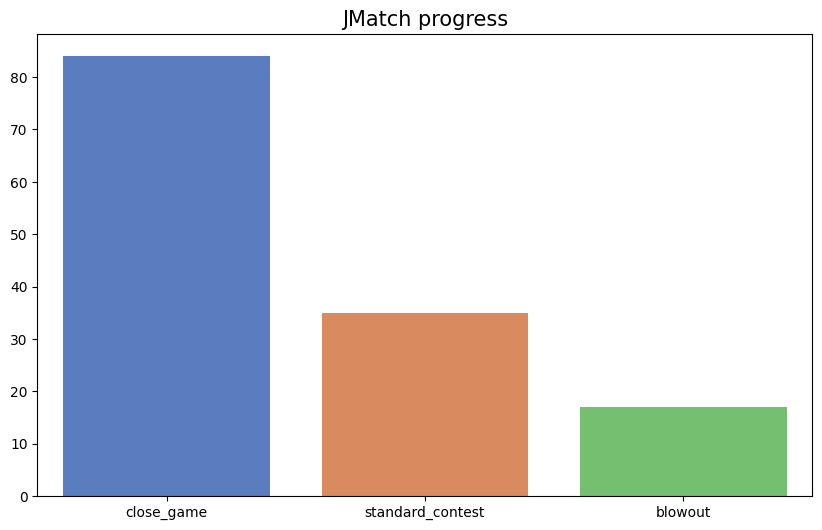

In [44]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x="pertandingan", y="gameId", data=pertandingan_games_df.sort_values(by='gameId', ascending=False), palette='muted', ax=ax)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("JMatch progress", loc="center", fontsize=15)
ax.tick_params(axis ='y', labelsize=10)

plt.show()
fig.savefig('fig6.png')

# SUMMARY

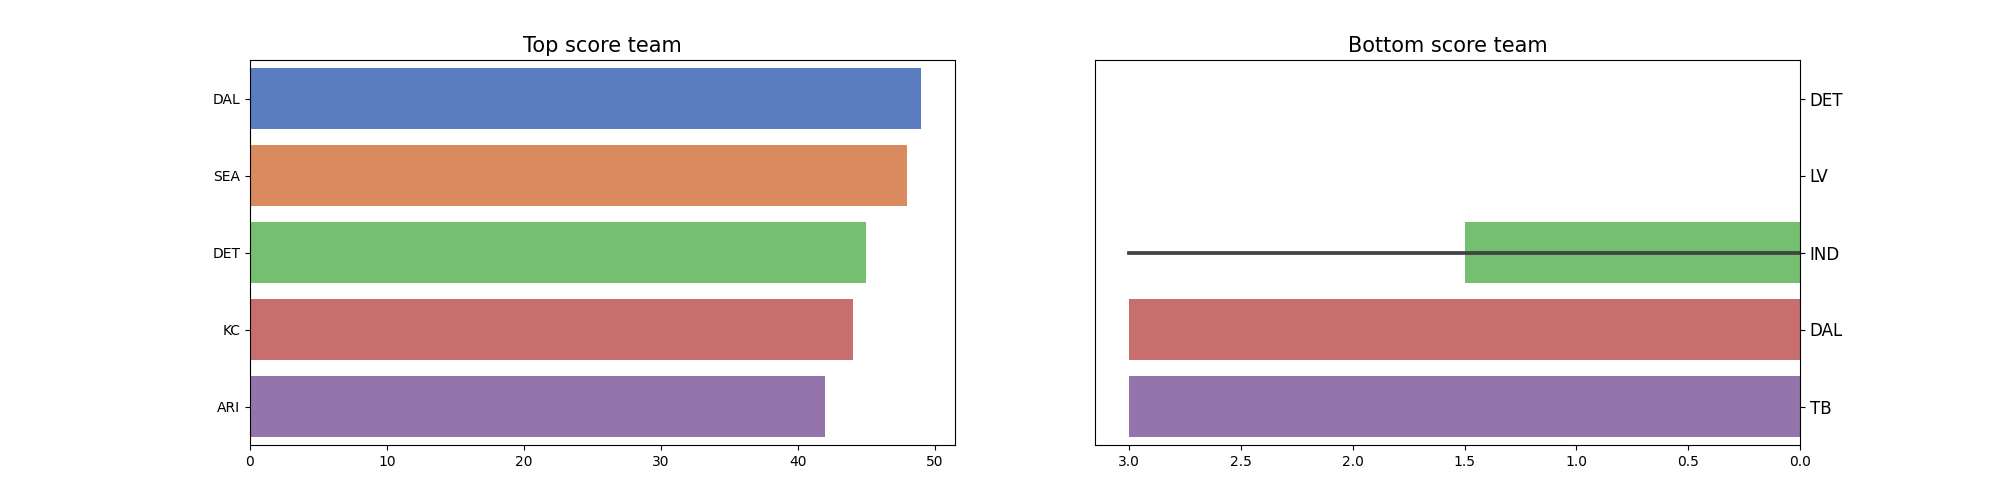

In [45]:
from IPython.display import Image, display
display(Image("fig1.png"))

Based on the image, it can be concluded that the match with the highest score was won by the DAL team with a score of 49. Meanwhile, the lowest scores were won by three teams, namely DET, LV, and IND with a score of zero.

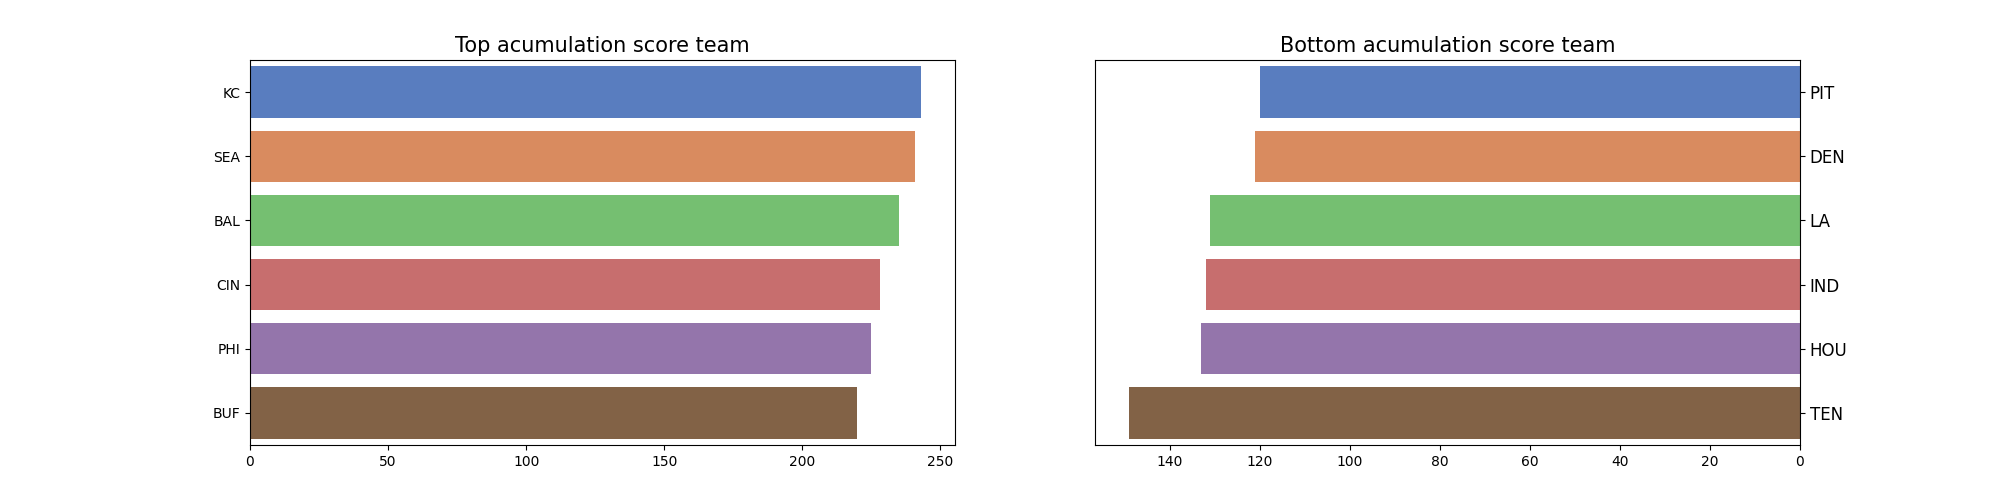

In [46]:
display(Image("fig2.png"))

Based on the image, it can be concluded that the highest and lowest accumulated scores from all matches were occupied by teams KC (243) and PIT (120).

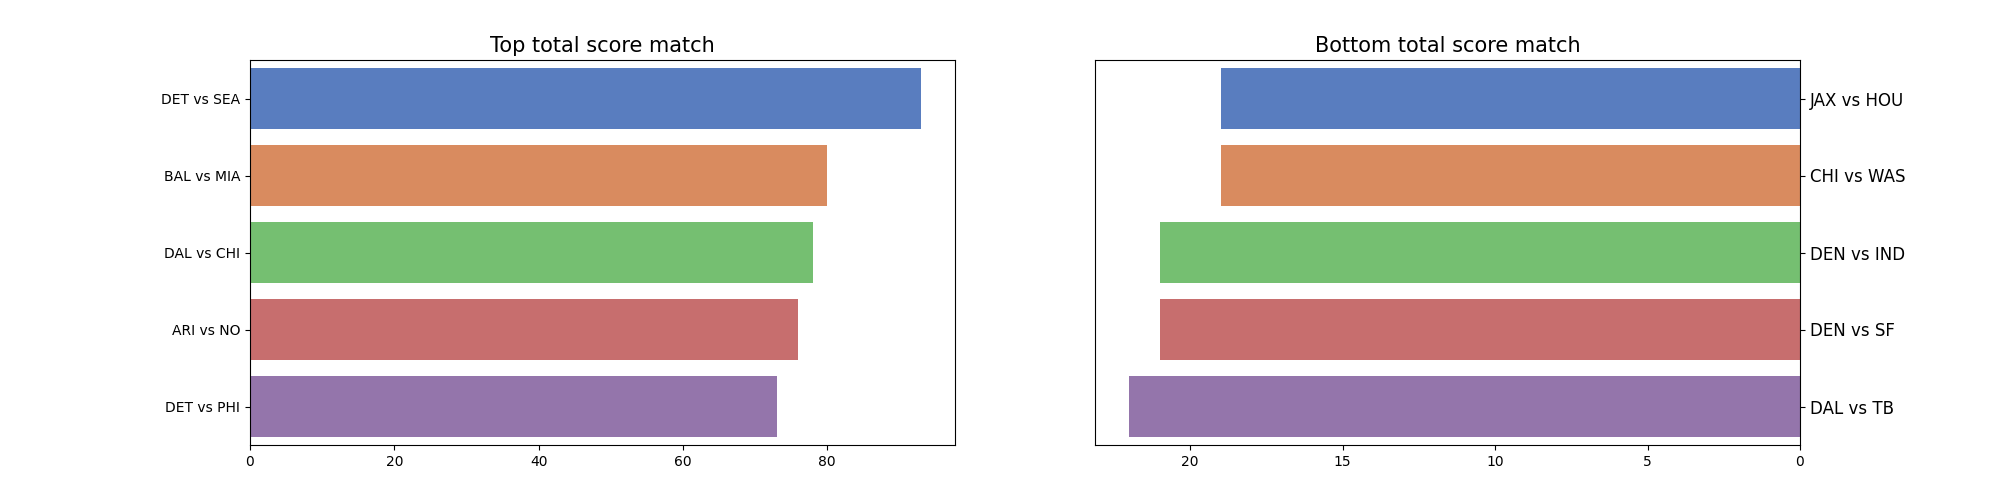

In [47]:
display(Image("fig3.png"))

Based on the picture, it can be concluded that the match with the highest score was between DET vs SEA with a total score of 93 points. While the lowest total score occurred in the match between JAX vs HOU and CHI vs WAS with a score of 19 points each.

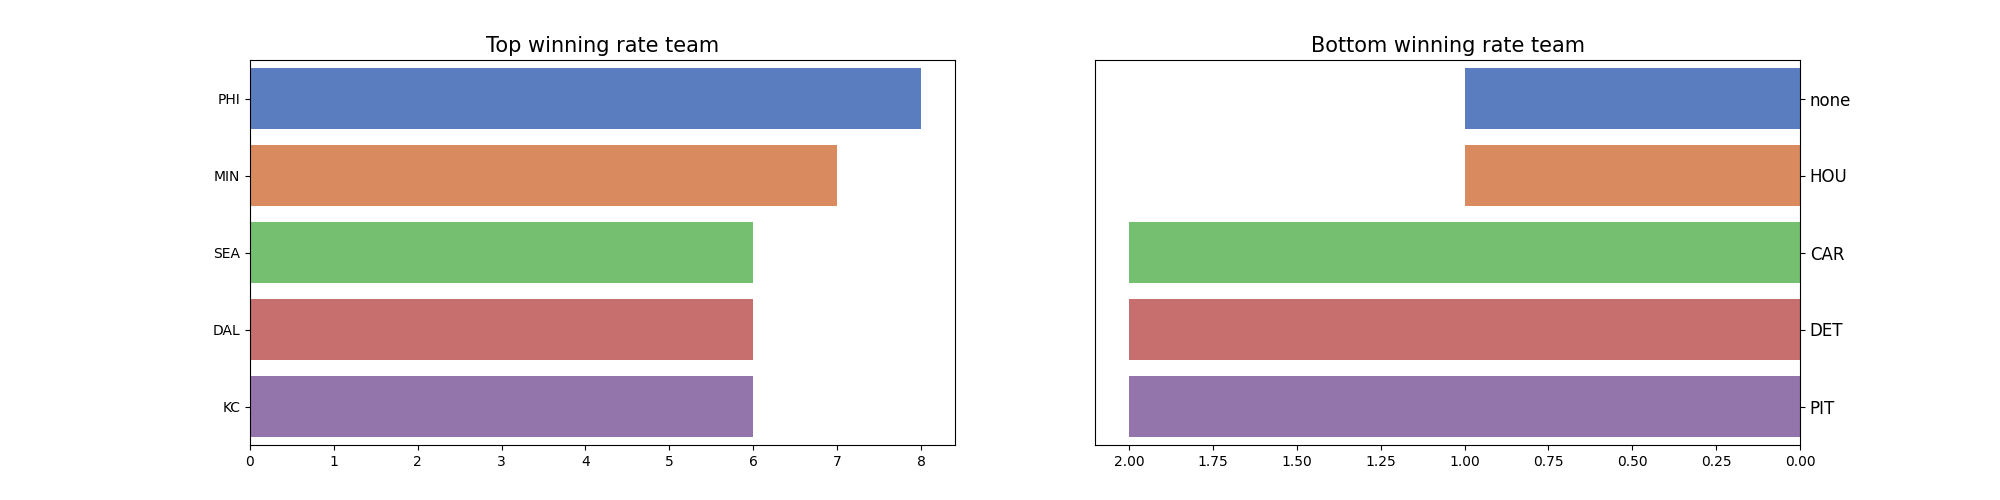

In [48]:
display(Image('fig4.png'))

Based on the image, it can be concluded that PHI is the team that wins the most with a total of 8 wins. While HOU only won one match, making it the team with the fewest wins.

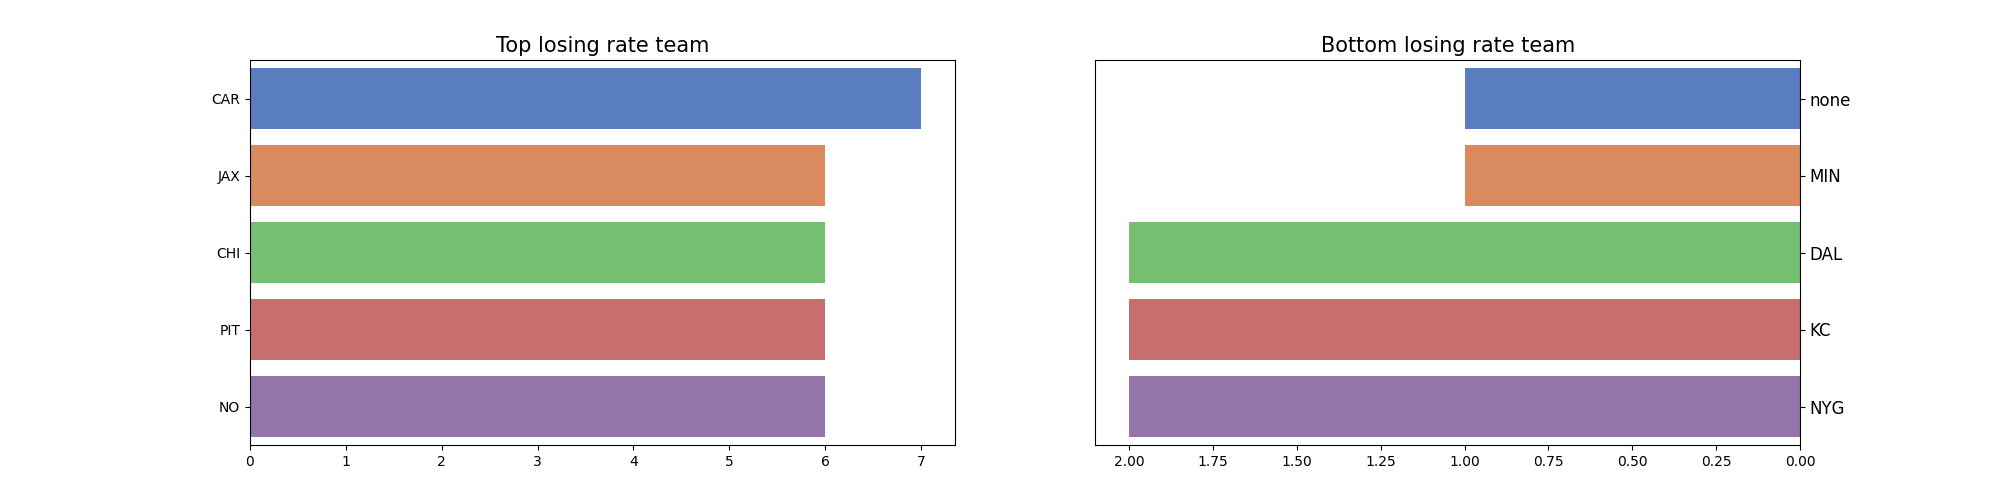

In [49]:
display(Image('fig5.png'))

Based on the picture, it can be concluded that CAR is the team that loses the most with seven defeats. While MIN is the team with the least total defeat, which is one defeat.

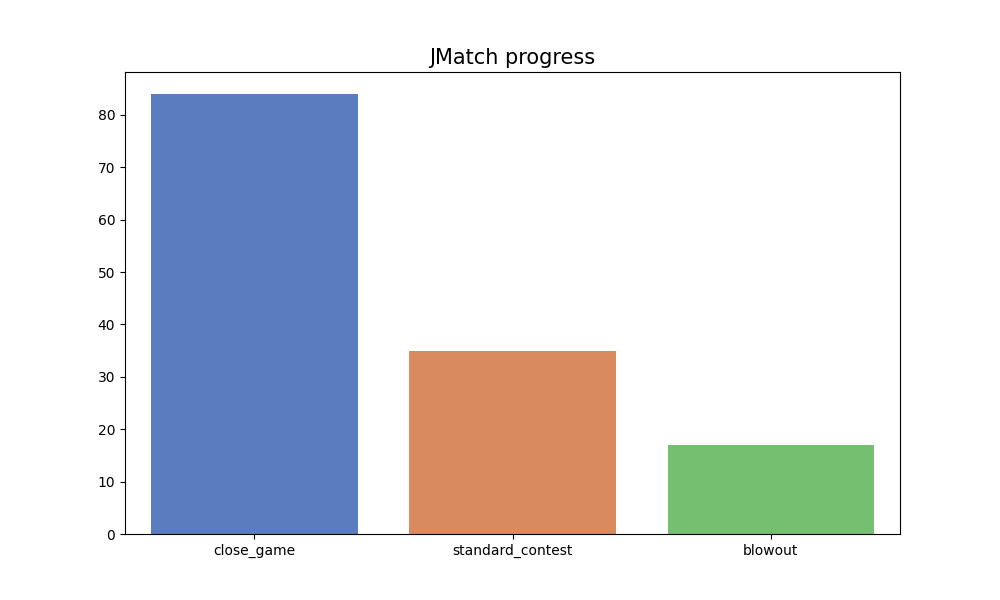

In [50]:
display(Image('fig6.png'))

This graph shows that there were 84 close_games, 35 standard_contests, and 17 blowouts. 61% of the games were close_games and only 0.12% were blowouts. It can be concluded that all the games are worth watching because of the large percentage of close_games.